In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv(r"sample_load_data_22.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.shape

(1699425, 67)

In [4]:
dataset['action_taken'].value_counts()

1    1674391
3      11287
4       8171
2       3776
5       1368
6        304
8         78
7         50
Name: action_taken, dtype: int64

In [15]:
index_names = dataset[ (dataset['action_taken'] == 4) | (dataset['action_taken']==5)|(dataset['action_taken']==6)|(dataset['action_taken']==8)].index
dataset.drop(index_names , inplace=True)

In [16]:
dataset.shape

(1689504, 67)

In [17]:
dataset['action_taken'].value_counts()

1    1674391
3      11287
2       3776
7         50
Name: action_taken, dtype: int64

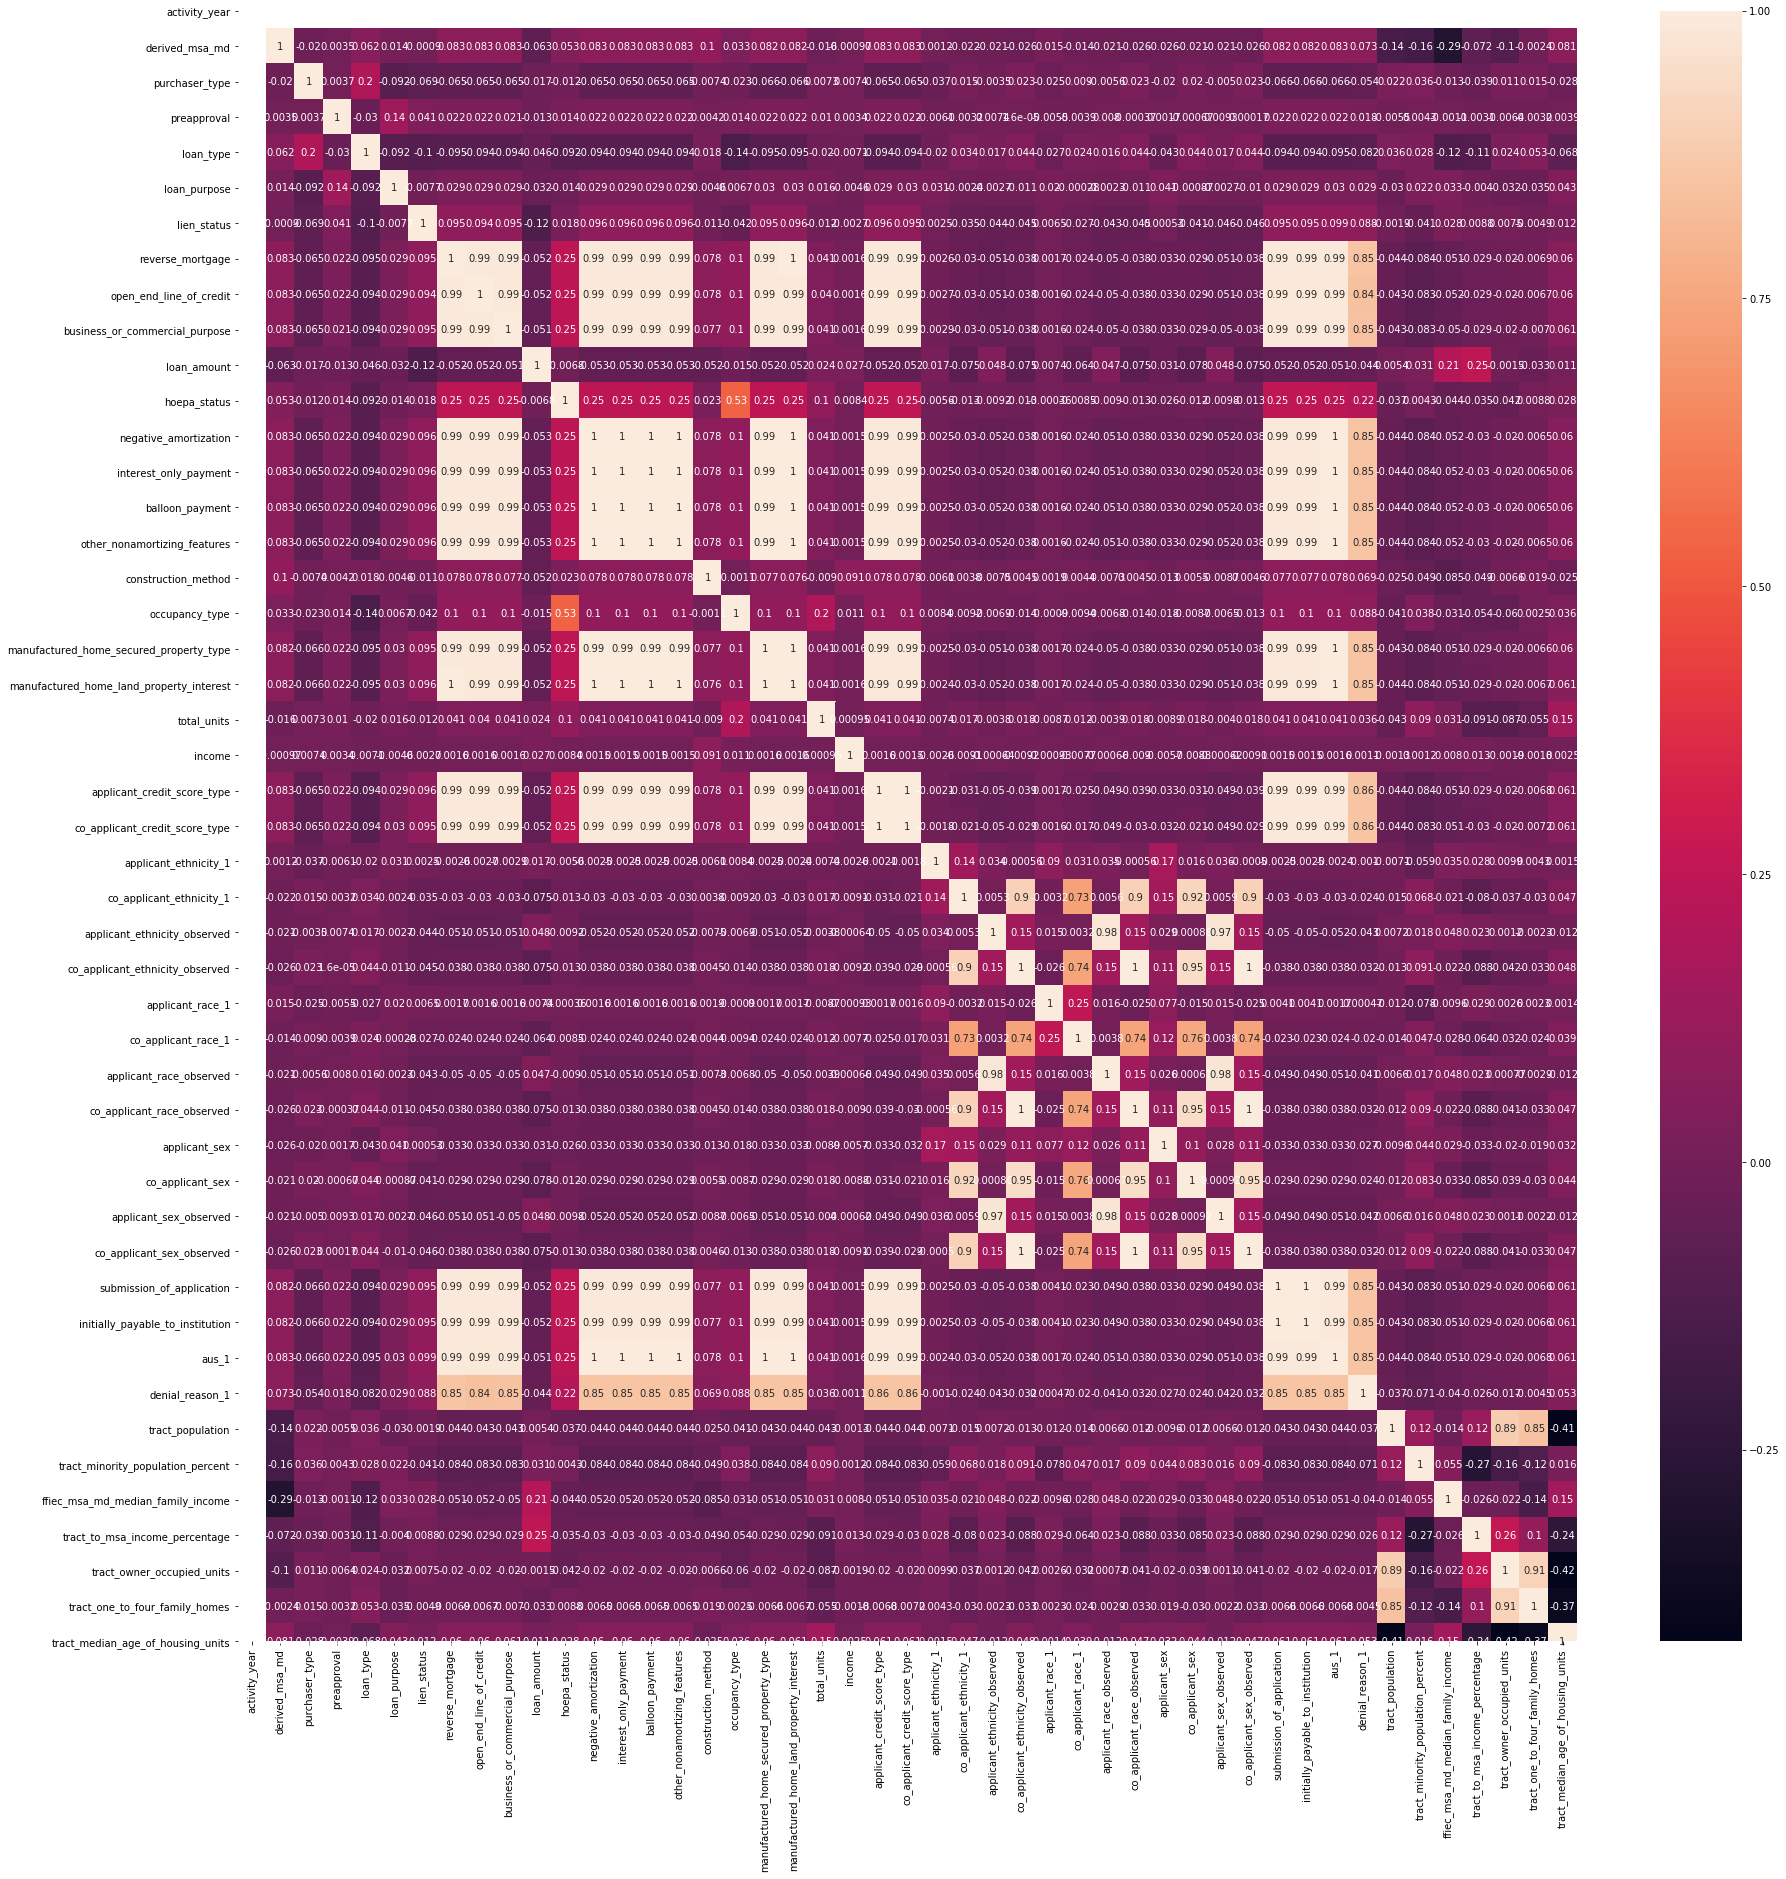

In [45]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.drop('action_taken', axis=1).corr(), annot=True);


In [18]:
dataset['action_taken'] = dataset['action_taken'].replace([3,7],0)

In [19]:
dataset['action_taken'] = dataset['action_taken'].replace([1,2],1)

In [20]:
dataset['action_taken'].value_counts()

1    1678167
0      11337
Name: action_taken, dtype: int64

In [21]:
dataset.dtypes[dataset.dtypes=='O']

lei                          object
state_code                   object
county_code                  object
census_tract                 object
conforming_loan_limit        object
derived_loan_product_type    object
derived_dwelling_category    object
derived_ethnicity            object
derived_race                 object
derived_sex                  object
loan_to_value_ratio          object
interest_rate                object
origination_charges          object
loan_term                    object
property_value               object
debt_to_income_ratio         object
applicant_age                object
co_applicant_age             object
applicant_age_above_62       object
dtype: object

In [22]:
dataset.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,42
1,float64,6
2,object,19


In [23]:
dataset.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus_1,denial_reason_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,549300MGPZBLQDIL7538,14260,ID,16027,1.6027e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,1,1,10,4030,33.90,69600,68,1083,1528,43
1,2018,549300LLKEKXL2RM1F61,12580,MD,24025,2.40253e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,1,10,8694,42.90,94900,94,2443,3199,19
2,2018,54930067MGJBFNEN1P47,19740,CO,8031,8.031e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,1,10,4406,20.13,89900,134,1358,1815,68
3,2018,549300MGPZBLQDIL7538,19660,FL,12127,1.21271e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,2,10,3853,6.67,55700,106,1241,1649,30
4,2018,03D0JEWFDFUS0SEEKG89,35614,NJ,34031,3.40312e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,6,10,6197,13.80,78000,183,1817,1871,48


In [24]:
dataset.shape

(1689504, 67)

In [25]:
dataset['derived_loan_product_type'].value_counts()

Conventional:First Lien          1207420
FHA:First Lien                    250718
VA:First Lien                     135194
Conventional:Subordinate Lien      66884
FSA/RHS:First Lien                 28827
FHA:Subordinate Lien                 439
VA:Subordinate Lien                   13
FSA/RHS:Subordinate Lien               9
Name: derived_loan_product_type, dtype: int64

In [26]:
dataset['census_tract'].value_counts()

48157672900.0    554
49035113107.0    548
48157673101.0    493
48439114103.0    444
12109020902.0    443
12095017103.0    417
38017040500.0    409
6061021322.0     388
48339692001.0    384
48121020108.0    376
48201542900.0    373
48157673200.0    369
16001010401.0    368
12115002712.0    368
48039660602.0    367
48201543002.0    363
48439113926.0    358
19153010203.0    356
51107611806.0    351
47187051202.0    349
48085030203.0    347
48085030305.0    341
16001010313.0    339
12109020602.0    333
45019004608.0    325
48453001858.0    319
12021011202.0    319
37101040203.0    316
16001010335.0    315
48157673400.0    315
                ... 
36029009006.0      1
13121001002.0      1
4013422402.0       1
27053104100.0      1
6059099244         1
37119001920.0      1
25009260302.0      1
45085001701        1
47185935000.0      1
55133203901        1
48201531000.0      1
39155920900.0      1
47061955300.0      1
55079040100.0      1
48245010800.0      1
6037207900.0       1
6031000701.0 

In [28]:
dataset.iloc[0:5:,0:10]

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity
0,2018,549300MGPZBLQDIL7538,14260,ID,16027,1.6027e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino
1,2018,549300LLKEKXL2RM1F61,12580,MD,24025,2.40253e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino
2,2018,54930067MGJBFNEN1P47,19740,CO,8031,8.031e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino
3,2018,549300MGPZBLQDIL7538,19660,FL,12127,1.21271e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino
4,2018,03D0JEWFDFUS0SEEKG89,35614,NJ,34031,3.40312e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino


In [29]:
dataset.iloc[0:5:,10:20]


,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit
0,White,Joint,1,1,2,1,1,1,2,2
1,White,Female,1,0,2,2,32,1,2,2
2,Joint,Joint,1,1,2,1,1,1,2,2
3,White,Joint,1,3,2,1,1,1,2,2
4,White,Joint,1,0,2,1,4,2,2,2


In [31]:
dataset.iloc[0:5:,20:30]

,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,hoepa_status,origination_charges,loan_term,negative_amortization,interest_only_payment,balloon_payment
0,2,155000,97.0,4.75,2,2261.43,360.0,2,2,2
1,2,155000,78.061,4.25,2,5068.14,360.0,2,2,2
2,2,335000,52.59,4.75,3,3521.25,360.0,2,2,2
3,2,185000,80.0,4.49,2,995.0,180.0,2,2,2
4,2,65000,69.71,5.84,2,0.0,180,2,2,2


In [32]:
dataset['total_units'].value_counts()

1    1657832
2      24177
3       4452
4       3043
Name: total_units, dtype: int64

In [34]:
dataset.iloc[0:5:,30:40]

,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,debt_to_income_ratio,applicant_credit_score_type
0,2,165000.0,1,1,3,5,1,59.0,46,2
1,2,195000.0,1,1,3,5,1,44.0,46,7
2,2,635000.0,1,3,3,5,1,240.0,30%-<36%,7
3,2,235000.0,1,2,3,5,1,137.0,39,1
4,2,605000.0,1,1,3,5,1,139.0,30%-<36%,2


In [35]:
dataset.iloc[0:5:,40:50]

,co_applicant_credit_score_type,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,co_applicant_race_1,applicant_race_observed,co_applicant_race_observed,applicant_sex
0,1,1.0,1.0,2,2,5.0,5.0,2,2,1
1,10,2.0,5.0,2,4,5.0,8.0,2,4,2
2,7,2.0,2.0,2,2,2.0,5.0,2,2,1
3,2,2.0,2.0,2,2,5.0,5.0,2,2,1
4,9,2.0,2.0,2,2,5.0,5.0,2,2,1


In [36]:
dataset.iloc[0:5:,50:60]

,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,denial_reason_1
0,2,2,2,25-34,25-34,No,1,1,1,10
1,5,2,4,65-74,9999,Yes,2,1,1,10
2,2,2,2,35-44,35-44,No,1,1,1,10
3,2,2,2,65-74,55-64,Yes,1,1,2,10
4,2,2,2,35-44,35-44,No,1,1,6,10


In [37]:
dataset.iloc[0:5:,60:70]

,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,4030,33.90,69600,68,1083,1528,43
1,8694,42.90,94900,94,2443,3199,19
2,4406,20.13,89900,134,1358,1815,68
3,3853,6.67,55700,106,1241,1649,30
4,6197,13.80,78000,183,1817,1871,48


In [ ]:
dataset.drop(dataset[dataset['applicant_age'] == "8888"].index, inplace = True) 

In [38]:
dataset['applicant_age'].value_counts()

35-44    411768
25-34    399285
45-54    355779
55-64    272379
65-74    146964
<25       61396
>74       41933
Name: applicant_age, dtype: int64

In [39]:
dataset['interest_only_payment'].value_counts()

2       1581629
1111      82209
1         25666
Name: interest_only_payment, dtype: int64

In [40]:
dataset['business_or_commercial_purpose'].value_counts()

2       1608148
1111      81226
1           130
Name: business_or_commercial_purpose, dtype: int64

In [41]:
dataset['purchaser_type'].value_counts()

0     421372
1     316421
3     224842
2     205673
71    195576
6     185645
9      87895
8      22543
5      14991
72     14358
4        188
Name: purchaser_type, dtype: int64

In [42]:
dataset['preapproval'].value_counts()

2    1614906
1      74598
Name: preapproval, dtype: int64

In [44]:
dataset['reverse_mortgage'].value_counts()

2       1607427
1111      82077
Name: reverse_mortgage, dtype: int64

In [46]:
features = ['co_applicant_age','interest_rate','activity_year','conforming_loan_limit','conforming_loan_limit','hoepa_status','origination_charges','negative_amortization','interest_only_payment','balloon_payment','other_nonamortizing_features','initially_payable_to_institution','denial_reason_1',"applicant_ethnicity_observed","co_applicant_ethnicity_observed","applicant_race_observed","co_applicant_race_observed","applicant_sex_observed","co_applicant_sex_observed","census_tract"]
dataset = dataset.drop(features, axis=1)

In [47]:
len(dataset.dtypes[dataset.dtypes=='O'])

14

In [48]:
#  dataset = df.copy()
dataset.shape

(1689504, 48)

In [49]:
dataset.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,28
1,float64,6
2,object,14


In [50]:
len(dataset.dtypes[dataset.dtypes=='object'])

14

In [ ]:
#dataset_copy =dataset.copy()

In [ ]:
#discount_points

In [51]:
cat_features = ['lei','state_code','county_code','derived_loan_product_type','derived_dwelling_category','derived_ethnicity','derived_race','derived_sex','applicant_age','applicant_age_above_62','debt_to_income_ratio']

In [52]:
float_var = ['loan_to_value_ratio','loan_term','property_value']



In [53]:
len(cat_features)

11

In [54]:
len(float_var)

3

In [55]:
dataset["loan_to_value_ratio"].value_counts()

80.0                  235956
95.0                  120550
96.5                  115150
100.0                  95869
Exempt                 82259
90.0                   77051
97.0                   56214
75.0                   48262
85.0                   41876
70.0                   18760
60.0                   10565
98.18                   9445
101.01                  6351
50.0                    5401
65.0                    4878
98.2                    3736
89.99                   2879
98.19                   2791
96.499                  2589
98.18799999999999       2416
79.0                    2390
74.0                    2188
78.0                    2167
72.0                    2157
98.189                  2097
68.0                    2068
73.0                    1891
77.0                    1864
103.3                   1853
69.0                    1786
                       ...  
68.368                     1
101.4652                   1
41.626999999999995         1
60.5882       

In [56]:
dataset.shape

(1689504, 48)

In [58]:
dataset.head()

,lei,derived_msa_md,state_code,county_code,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,applicant_age_above_62,submission_of_application,aus_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,549300MGPZBLQDIL7538,14260,ID,16027,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,White,Joint,1,...,No,1,1,4030,33.90,69600,68,1083,1528,43
1,549300LLKEKXL2RM1F61,12580,MD,24025,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Yes,2,1,8694,42.90,94900,94,2443,3199,19
2,54930067MGJBFNEN1P47,19740,CO,8031,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Joint,Joint,1,...,No,1,1,4406,20.13,89900,134,1358,1815,68
3,549300MGPZBLQDIL7538,19660,FL,12127,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,...,Yes,1,2,3853,6.67,55700,106,1241,1649,30
4,03D0JEWFDFUS0SEEKG89,35614,NJ,34031,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,...,No,1,6,6197,13.80,78000,183,1817,1871,48


In [59]:
#dfff = dataset.copy()
#dataset = dfff.copy()

In [60]:
dataset = dataset.replace(to_replace=['Exempt'], value=['1.00'])

In [61]:
dataset['loan_to_value_ratio'].value_counts()

80.0                  235956
95.0                  120550
96.5                  115150
100.0                  95869
1.00                   82259
90.0                   77051
97.0                   56214
75.0                   48262
85.0                   41876
70.0                   18760
60.0                   10565
98.18                   9445
101.01                  6351
50.0                    5401
65.0                    4878
98.2                    3736
89.99                   2879
98.19                   2791
96.499                  2589
98.18799999999999       2416
79.0                    2390
74.0                    2188
78.0                    2167
72.0                    2157
98.189                  2097
68.0                    2068
73.0                    1891
77.0                    1864
103.3                   1853
69.0                    1786
                       ...  
68.368                     1
101.4652                   1
41.626999999999995         1
60.5882       

In [62]:
dataset['loan_to_value_ratio'].isna().sum()

0

In [ ]:
#dataset=dataset.drop(dataset[dataset['loan_to_value_ratio'] == 'Exempt'].index, inplace = True) 

In [ ]:
#dataset[dataset.loan_to_value_ratio(lambda x: x.isnumeric())]

In [63]:
dataset[cat_features] = dataset[cat_features].apply(lambda x: pd.factorize(x)[0])

In [64]:
dataset[float_var] = dataset[float_var].apply(pd.to_numeric, errors='ignore')


In [65]:
dataset.isnull().sum()

lei                                         0
derived_msa_md                              0
state_code                                  0
county_code                                 0
derived_loan_product_type                   0
derived_dwelling_category                   0
derived_ethnicity                           0
derived_race                                0
derived_sex                                 0
action_taken                                0
purchaser_type                              0
preapproval                                 0
loan_type                                   0
loan_purpose                                0
lien_status                                 0
reverse_mortgage                            0
open_end_line_of_credit                     0
business_or_commercial_purpose              0
loan_amount                                 0
loan_to_value_ratio                         0
loan_term                                   0
property_value                    

In [56]:
dataset.shape

(1689504, 48)

In [66]:
dataset['action_taken'].value_counts()

1    1678167
0      11337
Name: action_taken, dtype: int64

In [ ]:
dataset.to_csv('./sample_clean.csv', index = False)